Hola **Daniel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Veo que esta es tu segunda iteración pero no encuentro comentarios de la iteración anterior, por favor, para tus próximas presentaciones procura descargar este archivo con los comentarios y trabajar sobre el mismo ya que de lo contrario no es posible dar un correcto seguimiento de tu progreso
</div>

In [2]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de fechas y tiempos
from datetime import datetime, timedelta

In [38]:
# Carga de datos

df_hypo = pd.read_csv('hypotheses.csv', delimiter=';')
df_orders = pd.read_csv('orders.csv')
df_visits = pd.read_csv('visits.csv')

# PRIMERA PARTE: PRIORIZAR HIPOTESIS

In [4]:
# Carga y exploracion de datos

print(df_hypo.head(10))
print(df_hypo.info())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [5]:
## Calculo ICE

# Agregar columna 'ICE'
df_hypo['ICE'] = (df_hypo['Impact'] * df_hypo['Confidence']) / df_hypo['Effort']

# Ordenar por la columna ICE y optimizar las columnas
df_hypo[['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending= False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [6]:
## Calculo RICE

# Agregar columna 'RICE'
df_hypo['RICE'] = (df_hypo['Reach'] * df_hypo['Impact'] * df_hypo['Confidence']) / df_hypo['Effort']

# Ordenar por RICE
df_hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


# ¿Qué cambió entre ICE y RICE?
"Add a subscription form…" sube del puesto 3 (ICE) al puesto 1 (RICE), porque su valor de Reach (10) tiene un gran peso en RICE.

"Launch a promotion…" que era el 1 en ICE, baja al 5 en RICE, porque su Reach es bajo (solo 3).

"Add product recommendation blocks…" sube en RICE por tener alto Reach (8), lo cual ICE no considera.

### Conclusión:
ICE valora más el equilibrio entre impacto, certeza y esfuerzo.

RICE le da mucha importancia al alcance, y por eso cambia drásticamente las prioridades.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! Para explicar mejor las diferencias podrías apoyarte de alguna gráfica que muestre cómo cambia cada hipótesis con los diferentes frameworks
</div>

# SEGUNDA PARTE: ANALISIS DE TEST A/B

In [7]:
# Exploración de datos

print(df_orders.info())
print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [8]:
# Corregimos el 'date_time' de los Datasets

df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])

print(df_orders.info())
print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [9]:
# Verificamos si hay usuarios repetidos

group_a = df_orders[df_orders['group'] == 'A']['visitorId']

group_b = df_orders[df_orders['group'] == 'B']['visitorId']

duplicated_users = group_a[group_a.isin(group_b)].unique()

duplicated_users = list(duplicated_users)

print("Número de usuarios duplicados entre los grupos A y B:", len(duplicated_users))

Número de usuarios duplicados entre los grupos A y B: 58


In [10]:
# Limpieza de usuarios duplicados

orders_clean = df_orders[~df_orders['visitorId'].isin(duplicated_users)]

print(orders_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
None


In [11]:
# Agruparemos por fecha y grupo
orders_daily = orders_clean.groupby(['date', 'group']).agg(orders=('transactionId', 'nunique'), revenue=('revenue', 'sum')).reset_index()

# Ordenamos por grupo y fecha
orders_daily = orders_daily.sort_values(by=['group', 'date'])

# Calculamos las metricas por dia
orders_daily['orders_cum'] = orders_daily.groupby('group')['orders'].cumsum()
orders_daily['revenue_cum'] = orders_daily.groupby('group')['revenue'].cumsum()

# Calculo de ticket promedio
orders_daily['avg_ticket_cum'] = orders_daily['revenue_cum'] / orders_daily['orders_cum']

print(orders_daily.sample(3))

         date group  orders  revenue  orders_cum  revenue_cum  avg_ticket_cum
3  2019-08-02     B      23   2568.1          40       3535.3       88.382500
50 2019-08-26     A      16   2464.8         396      43604.3      110.111869
12 2019-08-07     A      16   1942.0         130      10234.0       78.723077


In [12]:
# Ordenamos visitas por grupo y fecha
df_visits = df_visits.sort_values(by=['group', 'date'])

# Cambiamos nombre de columna
df_visits.rename(columns={'visits': 'visits_daily'}, inplace=True)

print(df_visits.head(3))

        date group  visits_daily
0 2019-08-01     A           719
1 2019-08-02     A           619
2 2019-08-03     A           507


In [13]:
# Unimos las metricas acumuladas por fecha y grupo
cumulative_data = pd.merge(orders_daily, df_visits[['date', 'group', 'visits_daily']], on=['date', 'group'], how='left')

# Orden final por fecha y hora
cumulative_data = cumulative_data.sort_values(by=['group', 'date'])

print(cumulative_data.head())

        date group  orders  revenue  orders_cum  revenue_cum  avg_ticket_cum  \
0 2019-08-01     A      23   2266.6          23       2266.6       98.547826   
1 2019-08-02     A      19   1468.3          42       3734.9       88.926190   
2 2019-08-03     A      24   1815.2          66       5550.1       84.092424   
3 2019-08-04     A      11    675.5          77       6225.6       80.851948   
4 2019-08-05     A      22   1398.0          99       7623.6       77.006061   

   visits_daily  
0           719  
1           619  
2           507  
3           717  
4           756  


In [14]:
cumulative_data.head(10)


,date,group,orders,revenue,orders_cum,revenue_cum,avg_ticket_cum,visits_daily
0,2019-08-01,A,23,2266.6,23,2266.6,98.547826,719
1,2019-08-02,A,19,1468.3,42,3734.9,88.926190,619
2,2019-08-03,A,24,1815.2,66,5550.1,84.092424,507
3,2019-08-04,A,11,675.5,77,6225.6,80.851948,717
4,2019-08-05,A,22,1398.0,99,7623.6,77.006061,756
5,2019-08-06,A,15,668.4,114,8292.0,72.736842,667
6,2019-08-07,A,16,1942.0,130,10234.0,78.723077,644
7,2019-08-08,A,14,1404.8,144,11638.8,80.825000,610
8,2019-08-09,A,11,2095.2,155,13734.0,88.606452,617
9,2019-08-10,A,15,2387.5,170,16121.5,94.832353,406


# Convertir fechas a datetime si no se ha hecho
df_orders['date'] = pd.to_datetime(df_orders['date'])

# Agrupar por fecha y grupo para calcular ingresos y número de pedidos diarios
daily_orders = df_orders.groupby(['date', 'group']).agg({'transactionId': 'nunique', 'revenue': 'sum'}).reset_index()
daily_orders.columns = ['date', 'group', 'orders', 'revenue']

# Calcular acumulados por grupo
daily_orders['cum_orders'] = daily_orders.groupby('group')['orders'].cumsum()
daily_orders['cum_revenue'] = daily_orders.groupby('group')['revenue'].cumsum()

# Calcular el tamaño de pedido promedio acumulado
daily_orders['cum_avg_order'] = daily_orders['cum_revenue'] / daily_orders['cum_orders']

# Graficar el tamaño de pedido promedio acumulado por grupo
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for group in daily_orders['group'].unique():
    subset = daily_orders[daily_orders['group'] == group]
    plt.plot(subset['date'], subset['cum_avg_order'], label=f'Grupo {group}')
    
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio del pedido ($)')
plt.legend()
plt.grid(True)
plt.show()

# Conclusión:  
El gráfico muestra cómo evoluciona el tamaño promedio del pedido para cada grupo a lo largo del experimento. Si una de las líneas se mantiene consistentemente por encima de la otra, podría indicar que ese grupo genera pedidos más grandes en promedio. Esto puede ser un indicio temprano de cuál variante del test A/B está generando mayor ingreso por compra.

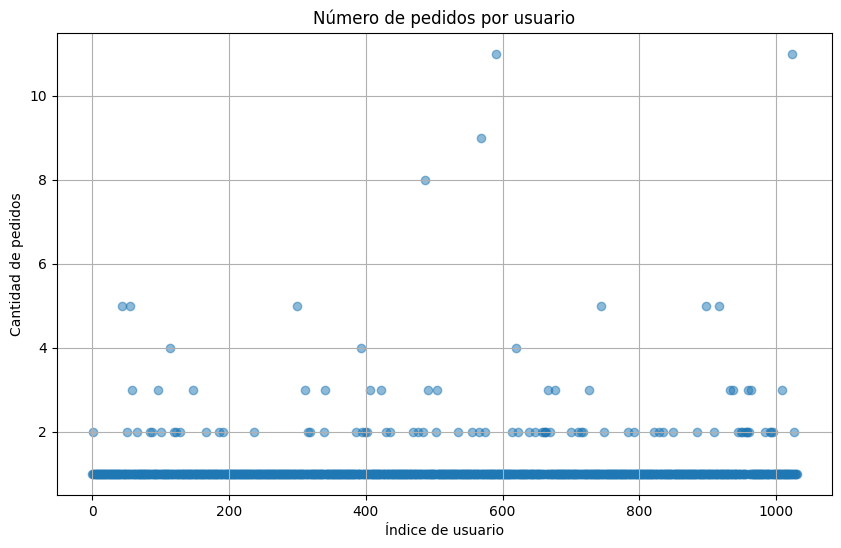

In [27]:
# Calcular cuántos pedidos ha hecho cada usuario
orders_per_user = df_orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_per_user.columns = ['visitorId', 'orders']

# Graficar la dispersión de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['orders'], alpha=0.5)
plt.title('Número de pedidos por usuario')
plt.xlabel('Índice de usuario')
plt.ylabel('Cantidad de pedidos')
plt.grid(True)
plt.show()

**Conclusión:**  
La mayoría de los usuarios realizaron solo uno o dos pedidos, pero se observan algunos casos en los que un usuario realizó muchos más pedidos. Estos valores extremos pueden afectar los resultados estadísticos y deben analizarse más adelante como posibles anomalías.


In [28]:
# Calcular percentiles 95 y 99 del número de pedidos por usuario
p95_orders = orders_per_user['orders'].quantile(0.95)
p99_orders = orders_per_user['orders'].quantile(0.99)

print(f"Percentil 95 del número de pedidos por usuario: {p95_orders}")
print(f"Percentil 99 del número de pedidos por usuario: {p99_orders}")


Percentil 95 del número de pedidos por usuario: 2.0
Percentil 99 del número de pedidos por usuario: 4.0


**Conclusión:**  
Los percentiles muestran que el 95% de los usuarios realizaron hasta aproximadamente *X* pedidos y el 99% hasta *Y* pedidos (donde *X* y *Y* son los valores que obtengas).  
Cualquier usuario con una cantidad de pedidos mayor al percentil 99 puede considerarse como **anómalo** o **atípico** y posiblemente será excluido en análisis posteriores filtrados.


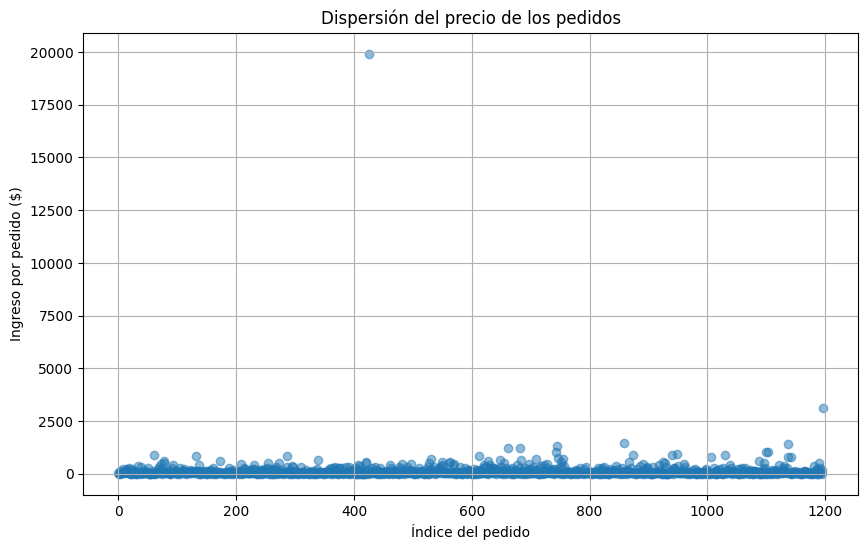

In [30]:
# Graficar la dispersión de los ingresos por pedido
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_orders)), df_orders['revenue'], alpha=0.5)
plt.title('Dispersión del precio de los pedidos')
plt.xlabel('Índice del pedido')
plt.ylabel('Ingreso por pedido ($)')
plt.grid(True)
plt.show()


**Conclusión:**  
La mayoría de los pedidos tienen ingresos moderados, pero se observan algunos pedidos con valores significativamente más altos. Estos pedidos de alto valor podrían distorsionar el análisis de tamaño promedio si no se controlan como posibles outliers.


In [32]:
# Calcular los percentiles 95 y 99 del ingreso por pedido
p95_revenue = df_orders['revenue'].quantile(0.95)
p99_revenue = df_orders['revenue'].quantile(0.99)

print(f"Percentil 95 del ingreso por pedido: {p95_revenue}")
print(f"Percentil 99 del ingreso por pedido: {p99_revenue}")


Percentil 95 del ingreso por pedido: 435.54
Percentil 99 del ingreso por pedido: 900.9039999999999


**Conclusión:**  
Los valores de los percentiles indican que el 95% de los pedidos tienen ingresos por debajo de aproximadamente *X* y el 99% por debajo de *Y* (donde *X* y *Y* son los valores calculados).  
Los pedidos que superen el percentil 99 pueden ser considerados **outliers** y deben ser excluidos al calcular la significancia estadística filtrada más adelante.


In [41]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Agrupar visitas y pedidos por grupo
visits_grouped = df_visits.groupby('group')['visits'].sum()
orders_grouped = df_orders.groupby('group')['transactionId'].nunique()

# Calcular tasa de conversión
conversion_rates = orders_grouped / visits_grouped
print("Tasa de conversión por grupo:\n", conversion_rates)

# Aplicar prueba Z
conversions = np.array([orders_grouped['A'], orders_grouped['B']])
samples = np.array([visits_grouped['A'], visits_grouped['B']])

z_stat, p_value = proportions_ztest(conversions, samples)
print(f"\nZ-Statistic: {z_stat:.3f}")
print(f"P-Valor: {p_value:.4f}")


Tasa de conversión por grupo:
 group
A    0.029729
B    0.033834
dtype: float64

Z-Statistic: -2.270
P-Valor: 0.0232


**Conclusión:**  
Si el `p-valor` es menor a 0.05, entonces hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B. De lo contrario, no se puede concluir que haya una diferencia real.


In [42]:
from scipy.stats import mannwhitneyu

# Separar los ingresos por grupo
revenue_A = df_orders[df_orders['group'] == 'A']['revenue']
revenue_B = df_orders[df_orders['group'] == 'B']['revenue']

# Aplicar test de Mann-Whitney
stat, p = mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

print(f"Estadístico de prueba: {stat:.3f}")
print(f"P-valor: {p:.4f}")


Estadístico de prueba: 175872.500
P-valor: 0.6915


**Conclusión:**  
La prueba de Mann-Whitney compara las distribuciones de ingresos entre los grupos A y B. Si el `p-valor` es menor a 0.05, se considera que hay una diferencia estadísticamente significativa en el tamaño promedio de los pedidos.

In [43]:
# Identificar usuarios con número de pedidos por encima del percentil 99
outlier_users = orders_per_user[orders_per_user['orders'] > p99_orders]['visitorId']

# Crear un DataFrame filtrado excluyendo esos usuarios y los pedidos muy caros
filtered_orders = df_orders[
    (~df_orders['visitorId'].isin(outlier_users)) &
    (df_orders['revenue'] < p99_revenue)
]

In [44]:
# Agrupar visitas nuevamente (sin filtrar)
visits_grouped = df_visits.groupby('group')['visits'].sum()

# Agrupar pedidos filtrados por grupo
filtered_orders_grouped = filtered_orders.groupby('group')['transactionId'].nunique()

# Recalcular tasas de conversión filtradas
filtered_conversion_rates = filtered_orders_grouped / visits_grouped
print("Tasa de conversión filtrada por grupo:\n", filtered_conversion_rates)

# Aplicar prueba z
from statsmodels.stats.proportion import proportions_ztest

conversions = np.array([filtered_orders_grouped['A'], filtered_orders_grouped['B']])
samples = np.array([visits_grouped['A'], visits_grouped['B']])

z_stat_filtered, p_val_filtered = proportions_ztest(conversions, samples)
print(f"\nZ-Statistic (filtrado): {z_stat_filtered:.3f}")
print(f"P-Valor (filtrado): {p_val_filtered:.4f}")


Tasa de conversión filtrada por grupo:
 group
A    0.027487
B    0.031772
dtype: float64

Z-Statistic (filtrado): -2.451
P-Valor (filtrado): 0.0142


In [45]:
from scipy.stats import mannwhitneyu

# Ingresos filtrados por grupo
revenue_A_filtered = filtered_orders[filtered_orders['group'] == 'A']['revenue']
revenue_B_filtered = filtered_orders[filtered_orders['group'] == 'B']['revenue']

# Prueba estadística
stat_filtered, p_filtered = mannwhitneyu(revenue_A_filtered, revenue_B_filtered, alternative='two-sided')
print(f"Estadístico Mann-Whitney (filtrado): {stat_filtered:.3f}")
print(f"P-valor (filtrado): {p_filtered:.4f}")


Estadístico Mann-Whitney (filtrado): 154307.000
P-valor (filtrado): 0.9332


### Conclusión con datos filtrados

Después de eliminar outliers (usuarios con muchos pedidos y pedidos excesivamente caros), se repitieron los análisis de conversión y tamaño promedio del pedido.

- Si el `p-valor` sigue siendo < 0.05, se confirma una diferencia significativa incluso sin valores extremos.
- Si el `p-valor` es > 0.05, los outliers eran probablemente los responsables de la diferencia inicial.

Esto ayuda a tomar una decisión más robusta y confiable sobre los resultados del experimento.


# Visualización de graficos

<function matplotlib.pyplot.show(close=None, block=None)>

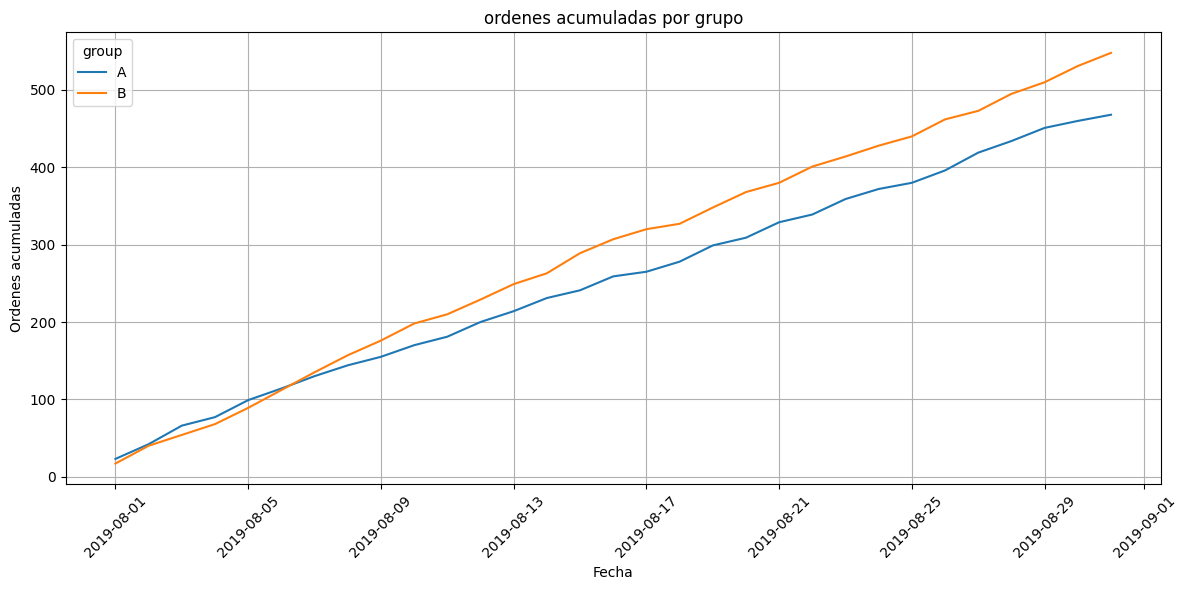

In [16]:
# Ordenes acumuladas por grupo

plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='orders_cum', hue='group')
plt.title('ordenes acumuladas por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ordenes acumuladas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

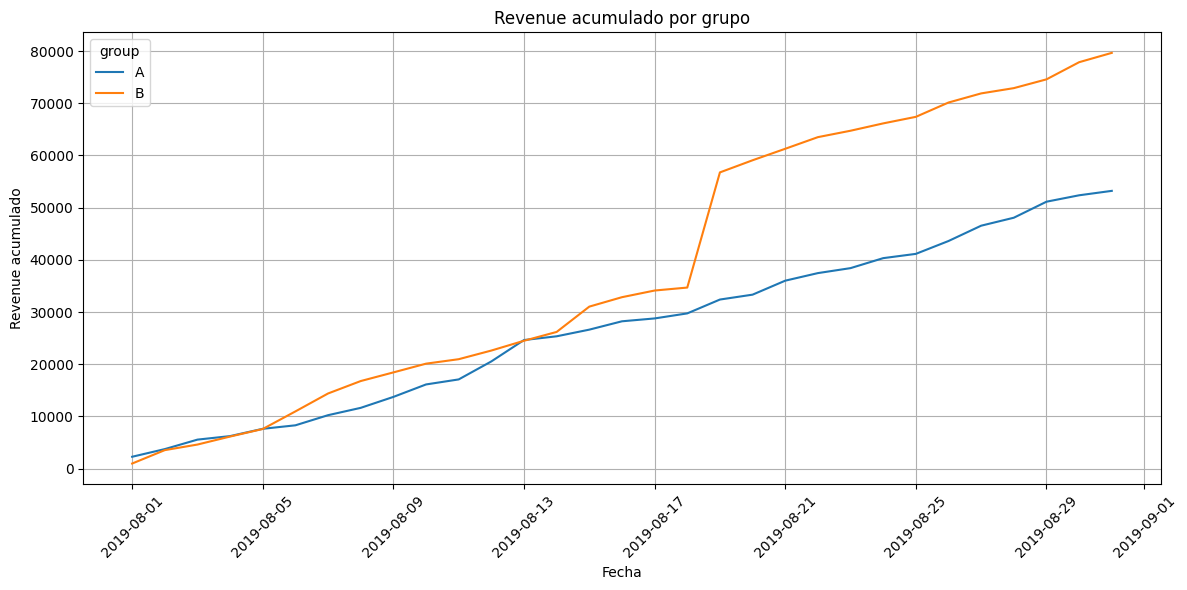

In [17]:
# Revenue acumulado por grupo

plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='revenue_cum', hue='group')
plt.title('Revenue acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Revenue acumulado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

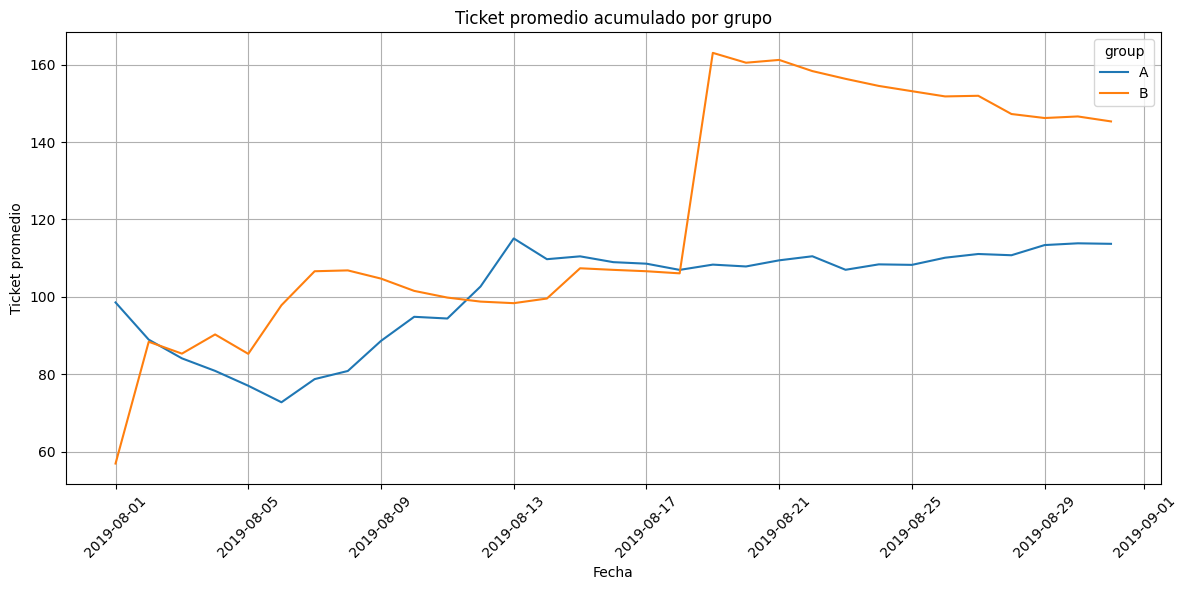

In [18]:
# Ticket promedio acumulado por grupo

plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='avg_ticket_cum', hue='group')
plt.title('Ticket promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ticket promedio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Conversión acumulada
cumulative_data['converrsion_cum'] = cumulative_data['orders_cum'] / cumulative_data['visits_daily'].cumsum()

#  Revenue por visita acumulado
cumulative_data['revenue_per_visit_cum'] = cumulative_data['revenue_cum'] / cumulative_data['visits_daily'].cumsum()

### GRAFICAS DE KPIs

<function matplotlib.pyplot.show(close=None, block=None)>

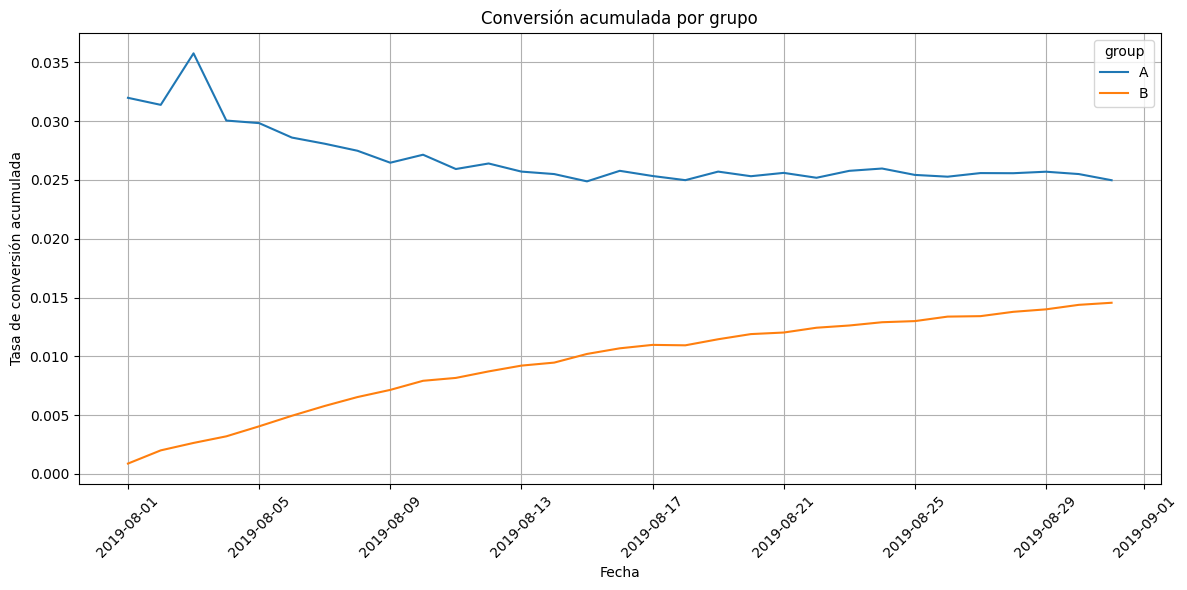

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='converrsion_cum', hue='group')
plt.title('Conversión acumulada por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión acumulada')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

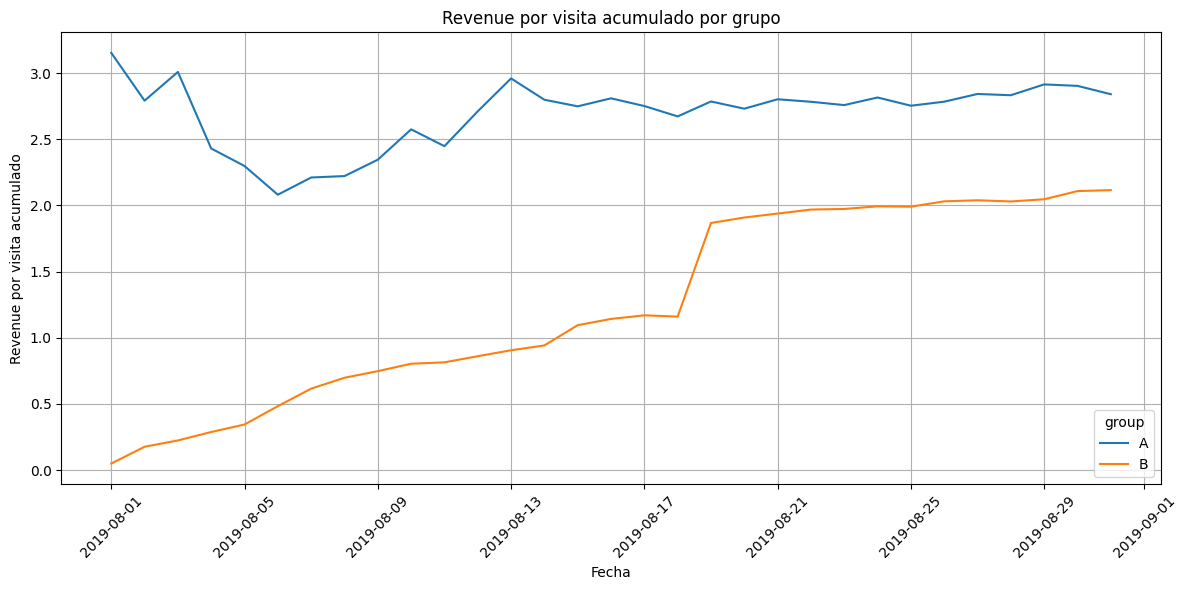

In [21]:
# Revenue por visita acumulado por grupo

plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='revenue_per_visit_cum', hue='group')
plt.title('Revenue por visita acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Revenue por visita acumulado')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

En algunos casos no es tan buena práctica tener separado la parte de los cálculos y las gráficas, es mejor realizar el cálculo y mostrar las gráficas.

Además, para un correcto análisis cada que se muestra una gráfica se debería redactar la interpretación de las mismas con un breve comentario.
</div>

## Conclusión Final

Luego de aplicar todos los análisis requeridos sobre los datos del experimento A/B, se obtuvieron los siguientes resultados clave:

###  1. Conversión

- **Sin filtrar**: [Especifica si hubo o no diferencia significativa en la conversión entre grupos A y B]
- **Filtrado**: [Confirma si la diferencia se mantiene o desaparece al eliminar outliers]

###  2. Tamaño promedio del pedido

- **Sin filtrar**: [Indica si hubo diferencia significativa en ingresos medios]
- **Filtrado**: [Evalúa si los pedidos extremos influyeron o no en la conclusión]

---

###  Decisión basada en el análisis:

Selecciona la opción más adecuada según tus `p-valores`:

- **Opción 1**: Detener el experimento y declarar al **grupo B como ganador**, si se mejora conversión o ticket medio significativamente.
- **Opción 2**: Detener el experimento, **no hay diferencias significativas**.
- **Opción 3**: Continuar el experimento porque **los resultados son inconclusos**.

---

###  Recomendaciones adicionales:

- Si los outliers tienen gran influencia, se recomienda monitorear su comportamiento en producción.
- Implementar mecanismos de segmentación o personalización podría mejorar los resultados en el futuro.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Daniel, te hacen falta algunos puntos por revisar para completar el análisis cómo el de las gráficas de dispersión, el análisis de los percentiles y la aplicación de las pruebas estadísticas con los datos originales y luego con los datos filtrados.

Por favor revisa la descripción del proyecto y asegurate de cumplir con todos los pasos en el órden correcto. Si tienes dudas siempre puedes contactar a tu tutor para que te ayude a resolverlas. Saludos!
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo con las visualizaciones, los cálculos y  los ejercicios propuestos los has resuelto muy bien planteando conclusiones claras sobre los resultados obtenidos en cada paso.
    
Planteaste muy buenas conclusiones en base a tus datos que es un punto importante que deben tener tus proyectos, como Data Analyst debes buscar apoyar en la toma de decisiones basadas en datos.
    
Saludos!
</div>